In [1]:
from ema_workbench import (Model, RealParameter, ScalarOutcome)
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time
from ema_workbench.em_framework.optimization import (ArchiveLogger,
                                                     EpsilonProgress)

import pandas as pd
import matplotlib as plt

# First, get the model
dike_model, planning_steps = get_model_for_problem_formulation(2)

# We will need experiments and outcomes, for the sake of scoping they are listed here
experiments, outcomes = (...,...)




[0 1 2]


In [2]:
# from ema_workbench import MultiprocessingEvaluator, ema_logging
# from ema_workbench.em_framework.evaluators import SequentialEvaluator

# ema_logging.log_to_stderr(ema_logging.INFO)

# # with MultiprocessingEvaluator(dike_model) as evaluator:
# with SequentialEvaluator(dike_model) as evaluator:
#     results1 = evaluator.optimize(nfe=100, searchover='levers',
#                                  epsilons=[0.1]*len(dike_model.outcomes))
#     # results = evaluator.perform_experiments(scenarios=100, policies=30)

# with MultiprocessingEvaluator(model) as evaluator:
# #with SequentialEvaluator(model) as evaluator:
#     results, convergence = evaluator.optimize(
#         nfe=100,
#         searchover="levers",
#         epsilons=[0.1]*len(dike_model.outcomes),
#         convergence=convergence_metrics,
#         reference=ref_scenario,
#         constraints=constraints
#         )
# #

    
    
    

In [3]:
results = pd.read_csv("directed search results/dike_model_policy_design.csv", index_col=0)
convergence = pd.read_csv("directed search results/dike_model_policy_design_convergence.csv") 

results.head()

# results.head()

print(dike_model.outcomes)
for o in dike_model.outcomes:
    print(o.name)




Expected Annual Damage
Dike Investment Costs
RfR Investment Costs
Evacuation Costs
Expected Number of Deaths
Total Investment Costs


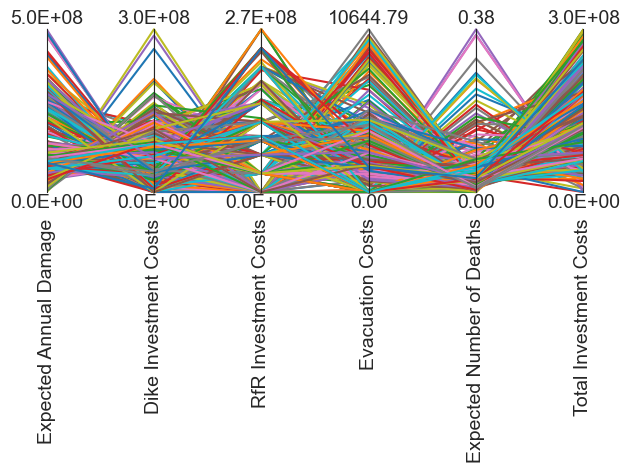

In [4]:
from ema_workbench.analysis import parcoords

data = results.loc[:, [o.name for o in dike_model.outcomes]]
limits = parcoords.get_limits(data)
limits.loc[0, ['Expected Annual Damage', 'Dike Investment Costs', 'RfR Investment Costs', 'Evacuation Costs', 'Expected Number of Deaths', 'Total Investment Costs']] = 0

formatter = {
    'Expected Annual Damage': '0.1E',
    'Dike Investment Costs': '0.1E',
    'RfR Investment Costs': '0.1E', 
    'Evacuation Costs': '.2f', 
    'Expected Number of Deaths': '.2f', 
    'Total Investment Costs': '0.1E',
}

paraxes = parcoords.ParallelAxes(limits, formatter)
paraxes.plot(data)
# plt.show()

In [30]:
my_archives = ArchiveLogger.load_archives("./directed search results/directed_search_convergence.tar.gz")
# df = pd.concat(my_archives.values(), ignore_index=True)
# df


# Iterate over each key (DataFrame) in the dictionary to remove the one empty column
for key in my_archives:
    # Drop the 'Unnamed: 0' column if it exists
    if 'Unnamed: 0' in my_archives[key].columns:
        my_archives[key] = my_archives[key].drop(columns=['Unnamed: 0'])

df = pd.concat(my_archives.values(), ignore_index=True)
df.head()

C:\Users\emma\AppData\Local\Temp\ipykernel_17852\3377152966.py:46: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(my_archives.values(), ignore_index=True)


,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,Total Investment Costs
0,0,0,0,1,0,0,0,0,0,0,...,8,7,5,5,1.168567e+07,6.171944e+08,217800000.0,472.802027,0.001021,8.349949e+08
1,0,0,0,0,0,0,0,0,0,0,...,1,7,0,0,6.675847e+06,2.013180e+08,0.0,0.000000,0.004293,2.013180e+08
2,0,1,0,0,0,0,1,0,0,0,...,0,3,0,1,3.452637e+07,1.439882e+08,115300000.0,628.230510,0.014006,2.592889e+08
3,0,0,0,0,0,0,0,0,1,0,...,0,4,0,0,1.573940e+07,1.537575e+08,30700000.0,537.626549,0.001555,1.844581e+08
4,0,0,0,0,0,0,1,0,1,0,...,1,0,0,0,3.169985e+08,1.544456e+07,61400000.0,3430.182957,0.025627,7.684799e+07


In [32]:
from ema_workbench import HypervolumeMetric
from ema_workbench.em_framework.optimization import to_problem

reference_set = results
problem = to_problem(dike_model, searchover="levers")
reference_set.columns


37

In [ ]:
import numpy as np

hv = HypervolumeMetric(reference_set, problem)

hypervolume = []
print(len(my_archives.items()))


# Iterate through my_archives and calculate hypervolume for each entry
for nfe, my_archive in my_archives.items():
    # Calculate hypervolume
    hypervolume_value = hv.calculate(my_archive)
    
    # Append (nfe, hypervolume_value) tuple to hypervolume list
    hypervolume.append((nfe, hypervolume_value))
    
    # Print progress report
    print(f"Progress: Calculated hypervolume for {nfe} NFEs")
    
# Sort hypervolume list based on the first element (nfe)
hypervolume.sort(key=lambda x: x[0])

# Convert hypervolume list to numpy array
hypervolume = np.asarray(hypervolume)


12
Progress: Calculated hypervolume for 0 NFEs
Progress: Calculated hypervolume for 100 NFEs


In [ ]:
#Time 14:37